In [1]:
import pandas as pd
import scanpy as sc
import os
from glob import glob
from os.path import join, exists
from src.config import ROOT_DIR
from src.utils.parse_config import read_config_file
os.chdir(ROOT_DIR)

import anndata as ad
import numpy as np

Project Directory: /data2/mito_lineage


In [2]:
from src.utils.scanpy_utils import *

here


In [3]:
prefix =  "jan21_2021"

In [4]:
config = read_config_file(join(ROOT_DIR, "Analysis", "lineage_and_peakclusters", prefix, "config.yaml"))
config

{'outdir': '/data2/mito_lineage/Analysis/lineage_and_peakclusters/results/jan21_2021/',
 'lineage_in': '/data2/mito_lineage/Analysis/multiplex/data/jan21_2021/chrM/pseudo/minC200_minAF0.01/numC25000_ispropFalse/flt3/',
 'aggregate_in': '/data2/isshamie/mito_lineage/data/processed/mtscATAC/jan21_2021/MTblacklist/reanalysis/outs/analysis/',
 'cell_names': ['/data2/mito_lineage/Analysis/multiplex/data/jan21_2021/chrM/P2_cellSNP_minC200_minAF0.01/cellSNP.samples.tsv',
  '/data2/mito_lineage/Analysis/multiplex/data/jan21_2021/chrM/J2_cellSNP_minC200_minAF0.01/cellSNP.samples.tsv'],
 'samples': 'J2,P2',
 'n_donors': 4,
 'only_donors': False,
 'nclones_values': '20,100',
 'prefix': 'jan21_2021',
 'genome': 'MTblacklist',
 'name': 'cd34',
 'sample_moniker': ['Control', 'Flt3l']}

In [5]:
dfs = {}
for nclones_val in ["20"]:#config["nclones_values"].split(","):
    print(nclones_val)
    dfs[nclones_val] = pd.read_csv(config["outdir"]+f"/cells_merged_lin_and_peak_nclones{nclones_val}.overlap_percent_normClone.csv", index_col=0).transpose()
full_df = dfs["20"]
full_df.index = full_df.index.astype("str")
full_df.columns = full_df.columns.astype("str")
df = full_df.drop(["Cluster", "Sample"], axis=0)


## Not including the different conditions into the same lineage. So (e.g. donor A - lineage 2 is now D3-L2-Flt3l and D3-L2-Ctrl)
## Note the difference is the shape of the matrix: 
## Before it was (#conditions*#cell clusters)-by-(lineages*donors), 
#  Here it's (#Cell-clusters)-by-(lineage*donors*conditions)
sample_df = {}
for ind, val in full_df.transpose().groupby("Sample"):
    val = val.set_index("Cluster")
    val = val.drop("Sample", axis=1)
    cols = val.apply(lambda x: x.name+"_"+ind)
    val.columns = cols
    sample_df[ind] = val
sample_df[ind]

sample_df = pd.concat(sample_df.values(),axis=1)

sample_df.index = sample_df.index.astype("str")
sample_df.columns = sample_df.columns.astype("str")
sample_df

20


,0_0_J2,0_1_J2,0_2_J2,0_3_J2,10_0_J2,10_1_J2,10_2_J2,10_3_J2,11_0_J2,11_1_J2,...,7_1_P2,7_2_P2,7_3_P2,8_0_P2,8_1_P2,8_2_P2,9_0_P2,9_1_P2,9_2_P2,9_3_P2
Cluster,,,,,,,,,,,,,,,,,,,,,
1,0.0588235,0.0714286,0.0408163,0.117647,0.166667,0.0384615,0.1,0.151515,0.0535714,0.0909091,...,0.09375,0.037037,0.125,0.111111,0.0540541,0.05,0.0555556,0.0882353,0.0666667,0.0588235
2,0.0392157,0.0714286,0.0204082,0.0588235,0.0333333,0.0384615,0.06,0.0606061,0.0178571,0.030303,...,0.125,0.296296,0.0625,0.111111,0.27027,0.2,0.0555556,0.338235,0.3,0.0588235
3,0.0980392,0.0714286,0.326531,0.0588235,0.1,0.192308,0.12,0.030303,0.0892857,0.0606061,...,0.09375,0.111111,0.0625,0.111111,0.0540541,0.1,0.0555556,0.132353,0.2,0.0588235
4,0.313725,0.0714286,0.0204082,0.117647,0.2,0.0769231,0.16,0.0606061,0.0714286,0.272727,...,0.0625,0.0740741,0.0625,0.0740741,0.027027,0.05,0.0555556,0.0441176,0.05,0.0588235
5,0.0588235,0.0714286,0.0204082,0.117647,0.0333333,0.0384615,0.08,0.0909091,0.0535714,0.0606061,...,0.0625,0.037037,0.0625,0.0740741,0.027027,0.1,0.111111,0.0441176,0.0666667,0.176471
6,0.0392157,0.0714286,0.0408163,0.0588235,0.0333333,0.0384615,0.08,0.030303,0.214286,0.0606061,...,0.125,0.0740741,0.0625,0.037037,0.0810811,0.05,0.111111,0.0882353,0.0666667,0.0588235
7,0.0784314,0.0714286,0.0408163,0.0588235,0.0666667,0.0769231,0.04,0.181818,0.0535714,0.121212,...,0.125,0.037037,0.0625,0.111111,0.162162,0.05,0.111111,0.0735294,0.0333333,0.0588235
8,0.176471,0.0714286,0.0204082,0.0588235,0.0333333,0.115385,0.1,0.151515,0.0892857,0.0909091,...,0.0625,0.037037,0.0625,0.037037,0.0810811,0.05,0.0555556,0.0147059,0.0166667,0.0588235
9,0.0196078,0.0714286,0.0204082,0.0588235,0.0333333,0.0384615,0.08,0.030303,0.107143,0.030303,...,0.0625,0.0740741,0.125,0.037037,0.027027,0.1,0.111111,0.0294118,0.1,0.117647


## Get obs data (each lineage) and var data (cell type-condition), then clean the df

In [6]:
obs_data = pd.DataFrame(df.apply(lambda x: x.name.split("_")[-1],axis=1)).rename({0:"Donor"}, axis=1)
obs_data


,Donor
0_0,0
0_1,1
0_2,2
0_3,3
10_0,0
...,...
8_2,2
9_0,0
9_1,1
9_2,2


In [7]:
var_data = full_df.loc[["Cluster", "Sample"]].transpose()
var_data


,Cluster,Sample
0,1,J2
2,2,J2
4,3,J2
6,4,J2
8,5,J2
10,6,J2
12,7,J2
14,8,J2
16,9,J2
18,10,J2


## Load into scanpy

In [8]:
adata = create_scanpy(df=df, sample_df=obs_data, feature_df=var_data)

In [9]:
adata

AnnData object with n_obs × n_vars = 79 × 28
    obs: 'Donor'
    var: 'Cluster', 'Sample'

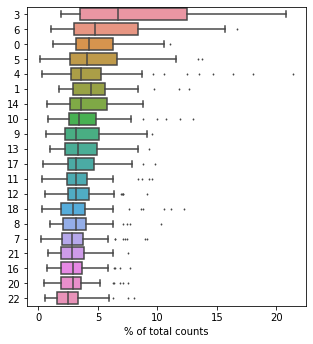

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20, )


... storing 'Donor' as categorical
... storing 'Cluster' as categorical
... storing 'Sample' as categorical


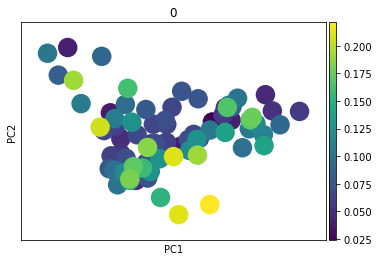

In [11]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='0')


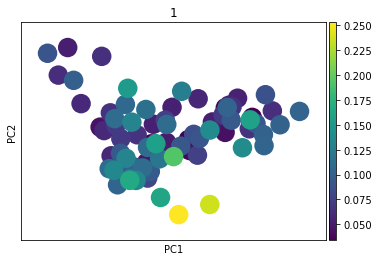

In [12]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='1')


In [13]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)


In [14]:
sc.tl.umap(adata)

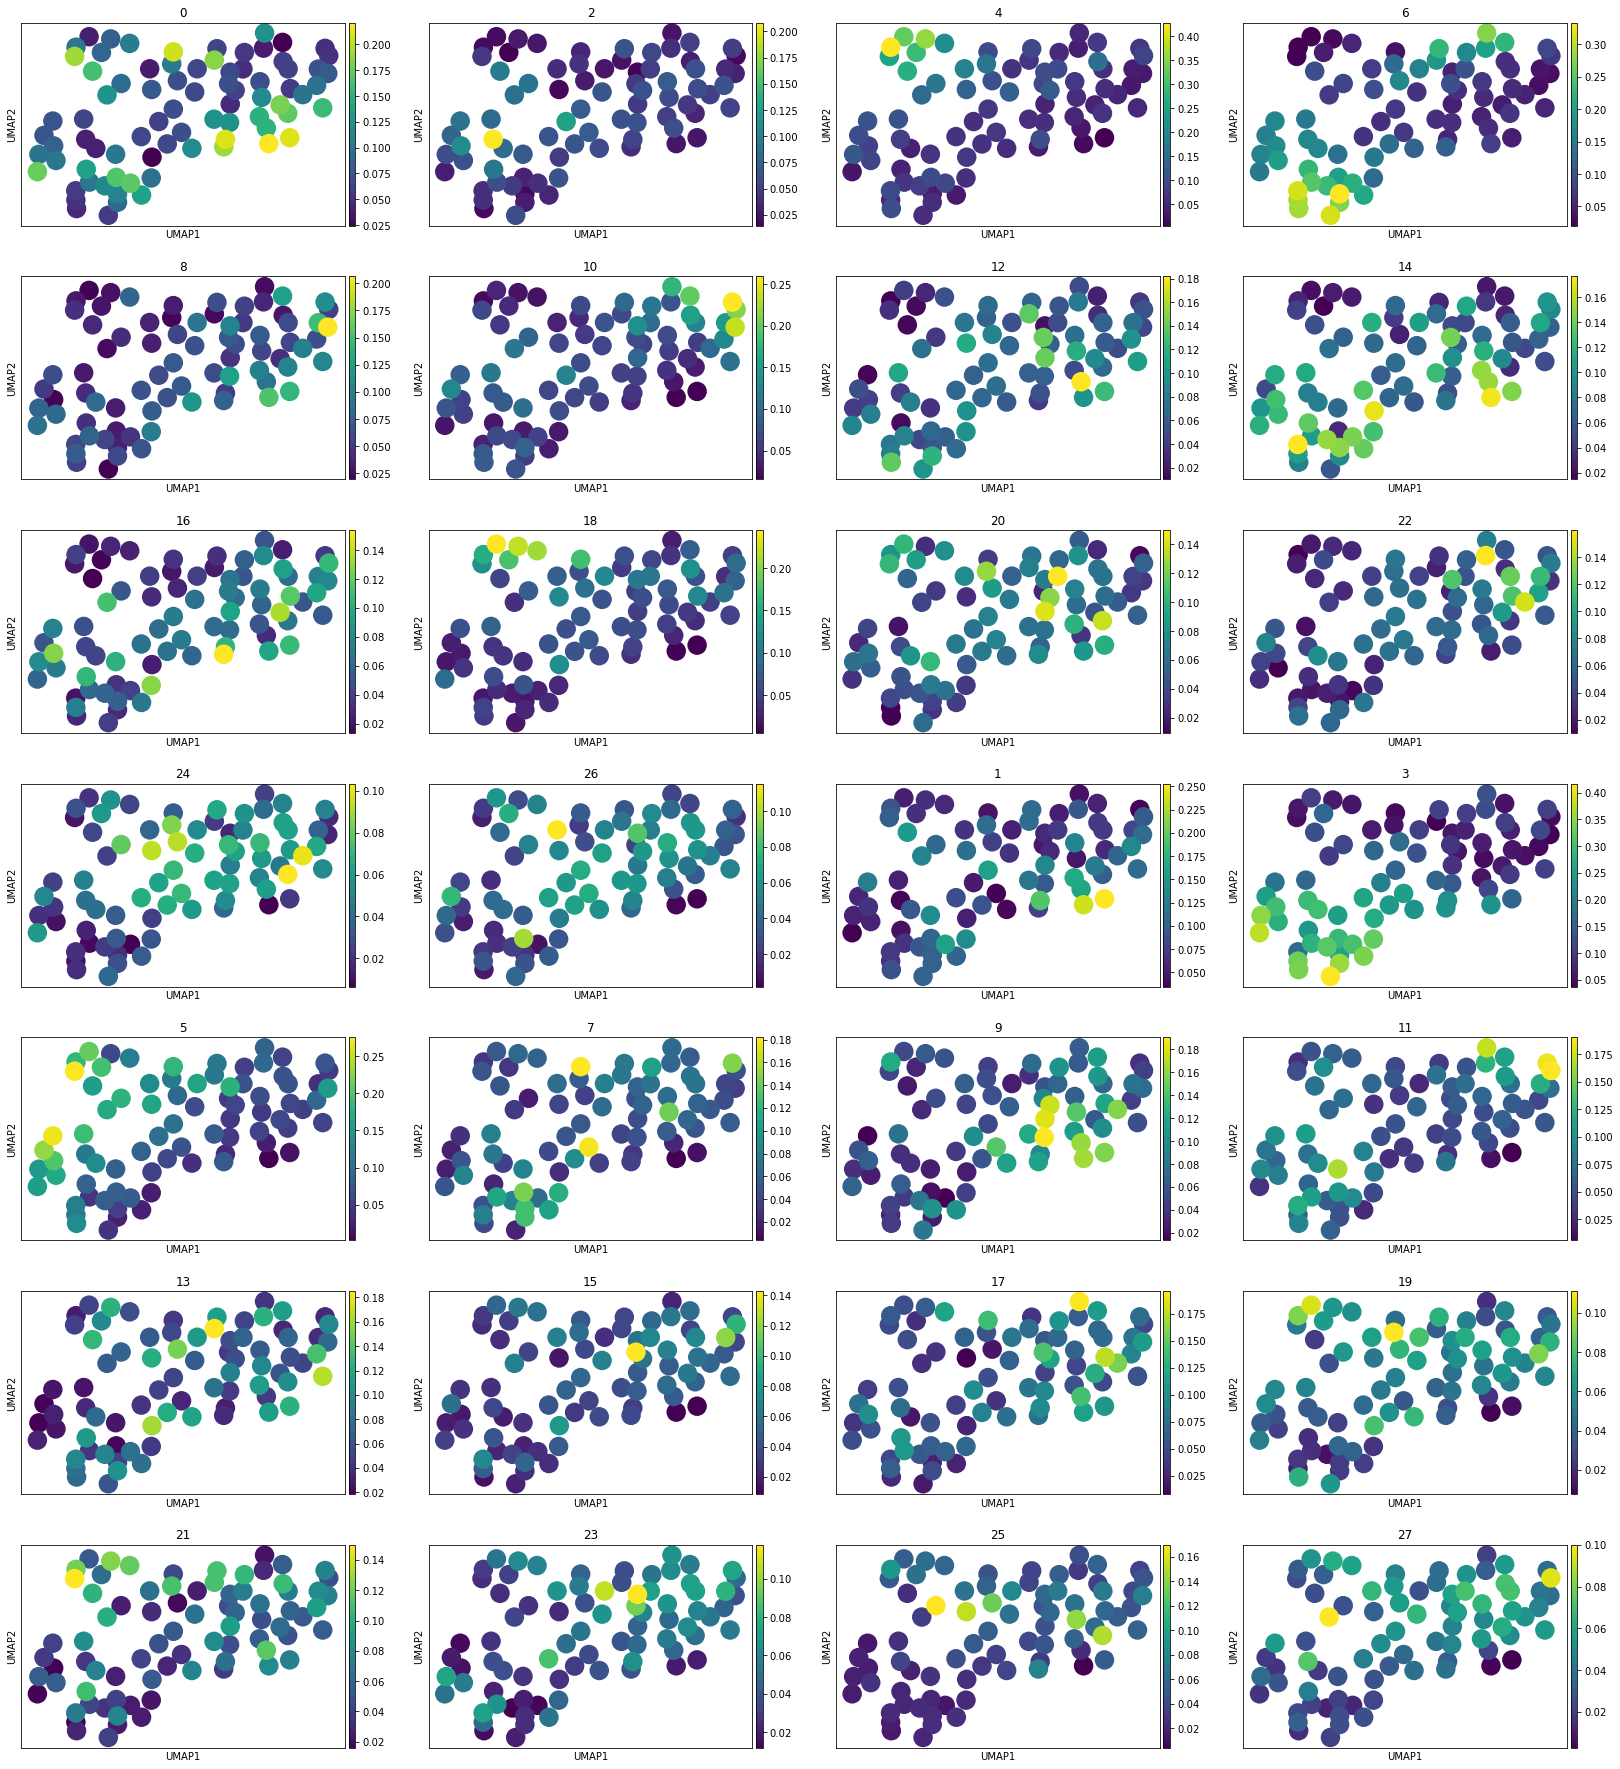

In [15]:
sc.pl.umap(adata, color=adata.var_names)

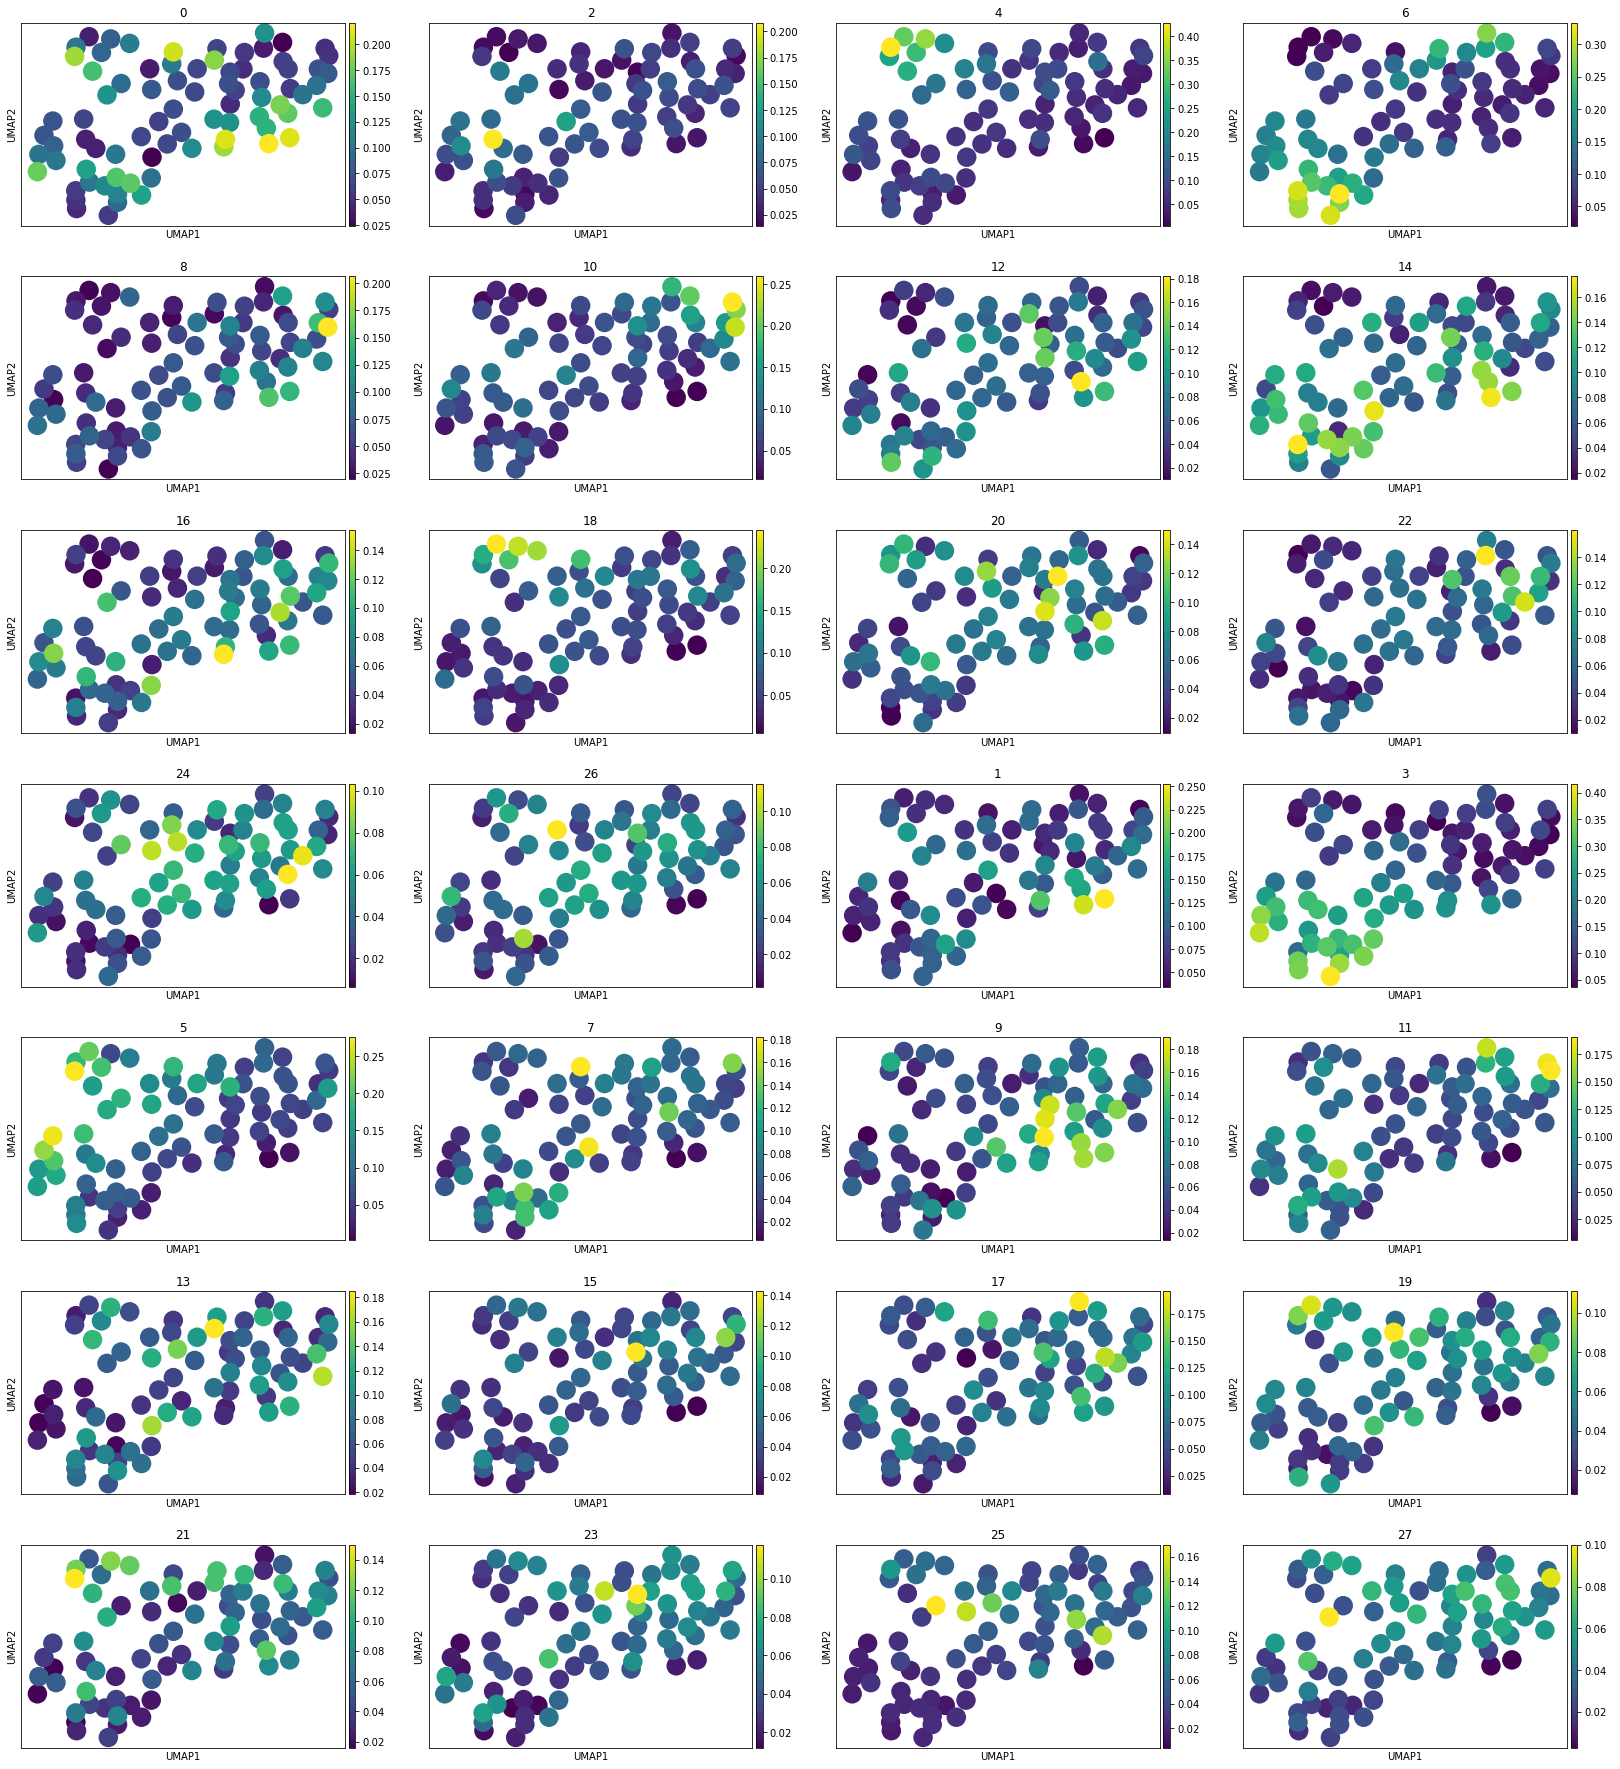

In [16]:
sc.pl.umap(adata, color=adata.var_names, use_raw=False)


In [18]:
sc.tl.leiden(adata)


In [19]:
import matplotlib.pyplot as plt

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Graph clustering')

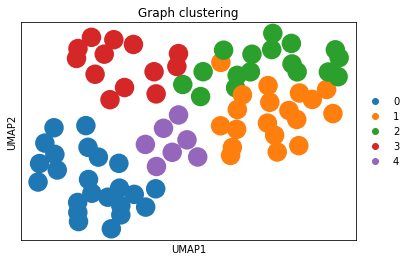

In [20]:
ax = sc.pl.umap(adata, color=['leiden'], show=False)
print(ax)
ax.set_title("Graph clustering")

Text(0.5, 1.0, 'Donor')

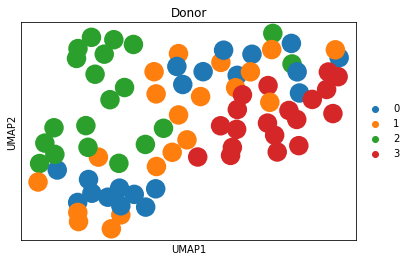

In [21]:
ax = sc.pl.umap(adata, color=['Donor'], show = False)
ax.set_title("Donor")

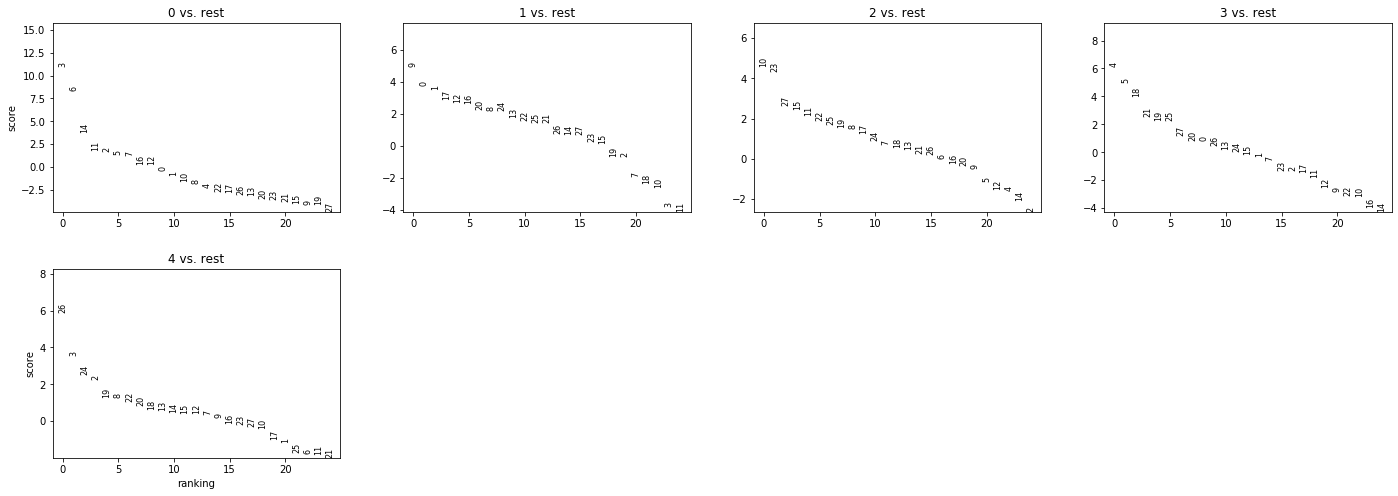

In [22]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [24]:
adata.obs

,Donor,leiden
0_0,0,0
0_1,1,4
0_2,2,3
0_3,3,4
10_0,0,0
...,...,...
8_2,2,4
9_0,0,2
9_1,1,0
9_2,2,0


------------

------------

------------